In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install d2l==1.0.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 68.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 66.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 76.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 6.0 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.3
    Uninstalling requests-2.32.3:
      Successfully uninstalled requests-2.32.3
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.2
    Uninstalling pyparsing-3.1.2:
      Successfully uninstalled pyparsing-3.1.2
  Attempting uninstall: numpy
    Found e

In [3]:
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l

In [4]:
class SoftmaxRegression(d2l.Classifier):  #@save
    """The softmax regression model."""
    def __init__(self, num_outputs, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(nn.Flatten(),
                                 nn.LazyLinear(num_outputs))  # 网络结构 展平层 + softmax

    def forward(self, X):
        return self.net(X)

In [5]:
# loss function
@d2l.add_to_class(d2l.Classifier)  #@save
def loss(self, Y_hat, Y, averaged=True):
    Y_hat = Y_hat.reshape((-1, Y_hat.shape[-1]))
    Y = Y.reshape((-1,))
    return F.cross_entropy(
        Y_hat, Y, reduction='mean' if averaged else 'none')

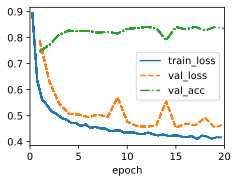

In [6]:
data = d2l.FashionMNIST(batch_size=256)
model = SoftmaxRegression(num_outputs=10, lr=0.15)
trainer = d2l.Trainer(max_epochs=20)
trainer.fit(model, data)

In [7]:
X, y = next(iter(data.val_dataloader()))  # 读取验证集数据
preds = model(X).argmax(axis=1)  # 预测

In [8]:
preds

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4, 1, 2, 2, 8, 0, 0, 7, 7, 7,
        1, 2, 6, 0, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 0, 1, 0, 7, 6, 7, 6, 1,
        2, 6, 6, 6, 5, 6, 2, 2, 8, 2, 8, 0, 7, 7, 8, 5, 1, 1, 0, 4, 7, 8, 7, 0,
        6, 6, 2, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2, 0, 6, 5, 3, 6, 7, 1, 8,
        0, 1, 6, 2, 3, 6, 7, 6, 7, 8, 5, 7, 9, 4, 2, 5, 7, 0, 5, 2, 8, 4, 7, 8,
        0, 0, 9, 9, 3, 0, 8, 4, 1, 5, 4, 1, 9, 1, 8, 6, 6, 1, 2, 5, 1, 0, 0, 0,
        1, 6, 1, 3, 2, 6, 6, 2, 1, 3, 5, 0, 4, 7, 9, 3, 7, 2, 3, 9, 0, 9, 4, 7,
        4, 2, 0, 5, 2, 1, 2, 1, 3, 0, 9, 1, 0, 9, 3, 8, 7, 9, 9, 4, 4, 7, 1, 2,
        1, 6, 3, 2, 8, 3, 6, 1, 1, 0, 2, 9, 2, 6, 0, 7, 9, 0, 4, 1, 8, 4, 1, 3,
        1, 6, 7, 4, 8, 5, 3, 0, 7, 7, 6, 6, 7, 0, 7, 8, 9, 2, 9, 0, 5, 1, 4, 2,
        5, 6, 9, 6, 2, 8, 6, 4, 6, 4, 9, 7, 0, 5, 5, 4])

In [9]:
wrong = preds.type(y.dtype) != y  # 预测错误
wrong

tensor([False, False, False, False, False, False, False, False, False, False,
        False, False,  True, False, False, False, False,  True, False, False,
         True,  True, False,  True, False,  True, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
         True, False,  True, False, False, False,  True, False, False,  True,
         True,  True, False,  True, False, False, False,  True, False, False,
        False, False, False, False, False, False,  True,  True,  True, False,
        False, False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False,  True, False,
        False, False, False,  True, False, False, False,  True, False, False,
        False, False, False, False, False, False, False,  True, False, False,
        False, False, False, False, False, False, False, False, 

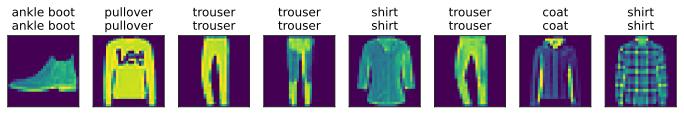

In [10]:
# 显示部分预测图片
indexs = [i for i in range(8)]
X, y, preds = X[indexs], y[indexs], preds[indexs]
labels = [a+'\n'+b for a, b in zip(
    data.text_labels(y), data.text_labels(preds))]  # 第一行为正确的 label 第二行为预测的 label
data.visualize([X, y], labels=labels)  # 默认显示 1 行 8 列